# Interaktive Lösung und "Spielplatz" 
für die Cahn-Hillard Gleichung wie sie in der Vorlesung gezeigt wurde.

𝜕𝑐/𝜕𝑡=𝐷∆(𝜕𝑓/𝜕𝑐−𝜀∆𝑐)

Für interessierte: Spielen Sie mit den Parametern herum und beobachten Sie was passiert!
Der Spinodalfaktor beschreibt die ausprägung der W-form der freien Enthalpiedichte, ein niedriger Wert spiegelt also die Situation bei hohen Temperauren wieder.


In [0]:
#@title Paramters für die Simulation
grid_groesse = 250 #@param {type:"slider", min:10, max:500, step:1}
dauer = 0.21 #@param {type:"slider", min:0.01, max:2, step:0.01}
mesh_abstand = 0.05 #@param {type:"slider", min:0.01, max:5, step:0.01}
spinodal_faktor = 2 #@param {type:"slider", min:0.0, max:4, step:0.1}
sp = spinodal_faktor

import matplotlib.pyplot as plt
import numpy as np
try:
  from fipy import *
except:
  !pip install fipy  
  
#this code is largely taken from the fipy examples at
#https://www.ctcms.nist.gov/fipy/examples/cahnHilliard/generated/examples.cahnHilliard.mesh2DCoupled.html
nx = ny = grid_groesse
mesh = Grid2D(nx=nx, ny=ny, dx=mesh_abstand, dy=mesh_abstand)
phi = CellVariable(name=r"$\phi$", mesh=mesh)
psi = CellVariable(name=r"$\psi$", mesh=mesh)

noise = GaussianNoiseVariable(mesh=mesh,
                              mean=0.5,
                              variance=0.01).value
phi[:] = noise
D = a = epsilon = 1.
#Hier änderungen an den Gleichungen durchführen
#z.B. die W-form der Gleichung ändern
dfdphi = a**2 * sp * phi * (1 - phi) * (1 - 2 * phi)
dfdphi_ = a**2 * sp * (1 - phi) * (1 - 2 * phi)
d2fdphi2 = a**2 * sp * (1 - 6 * phi * (1 - phi))
eq1 = (TransientTerm(var=phi) == DiffusionTerm(coeff=D, var=psi))
eq2 = (ImplicitSourceTerm(coeff=1., var=psi)
       == ImplicitSourceTerm(coeff=-d2fdphi2, var=phi) - d2fdphi2 * phi + dfdphi
       - DiffusionTerm(coeff=epsilon**2, var=phi))
eq3 = (ImplicitSourceTerm(coeff=1., var=psi)
       == ImplicitSourceTerm(coeff=dfdphi_, var=phi)
       - DiffusionTerm(coeff=epsilon**2, var=phi))

eq = eq1 & eq2

dexp = -5
elapsed = 0.
duration = dauer
i = 0
phis,psis = [],[]
while elapsed < duration:
     dt = min(100, numerix.exp(dexp))
     elapsed += dt
     dexp += 0.01
     eq.solve(dt=dt)
     phis.append(np.copy(numerix.asfarray(phi)))
     psis.append(np.copy(numerix.asfarray(psi)))
     print('In Simulationszeit sind {} Einheiten vergangen '.format(elapsed))

In Simulationszeit sind 0.00673794699909 Einheiten vergangen 
In Simulationszeit sind 0.0135436114913 Einheiten vergangen 
In Simulationszeit sind 0.0204176740488 Einheiten vergangen 
In Simulationszeit sind 0.0273608220836 Einheiten vergangen 
In Simulationszeit sind 0.0343737499161 Einheiten vergangen 
In Simulationszeit sind 0.0414571588452 Einheiten vergangen 
In Simulationszeit sind 0.0486117572175 Einheiten vergangen 
In Simulationszeit sind 0.0558382604989 Einheiten vergangen 
In Simulationszeit sind 0.0631373913457 Einheiten vergangen 
In Simulationszeit sind 0.070509879677 Einheiten vergangen 
In Simulationszeit sind 0.077956462748 Einheiten vergangen 
In Simulationszeit sind 0.085477885223 Einheiten vergangen 
In Simulationszeit sind 0.0930748992505 Einheiten vergangen 
In Simulationszeit sind 0.100748264538 Einheiten vergangen 
In Simulationszeit sind 0.10849874843 Einheiten vergangen 
In Simulationszeit sind 0.116327125979 Einheiten vergangen 
In Simulationszeit sind 0.1242

# Fragen
1.   Was wird besser beschrieben? Kurze oder lange zeiten?
2.   Warum werden die ergebnisse mit der Zeit immer ähnlicher?
Für Interessierte:
3. Code mit verschiedenen spinodal_faktoren laufen lassen diese simulieren unterschiedliche Temperaturen




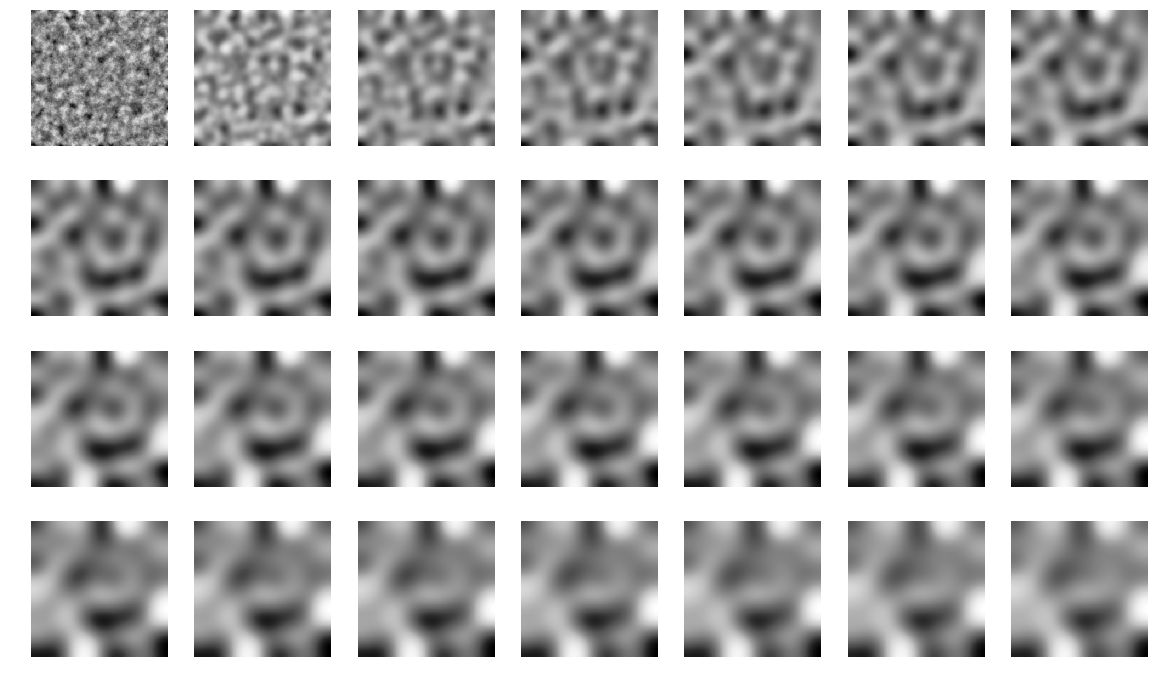

In [0]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(4,7,figsize=(20,12))
axs = axs.flatten()
for i,ax in enumerate(axs):
    ax.imshow(psis[i].reshape(250,250))
    ax.axis('off')